In [46]:
# Import all the necessary packages
import numpy as np
import nibabel as nib                                                     # Read / write access to some common neuroimaging file formats
import itk                                                                # Jupyter widgets to visualize images in 2D and 3D
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

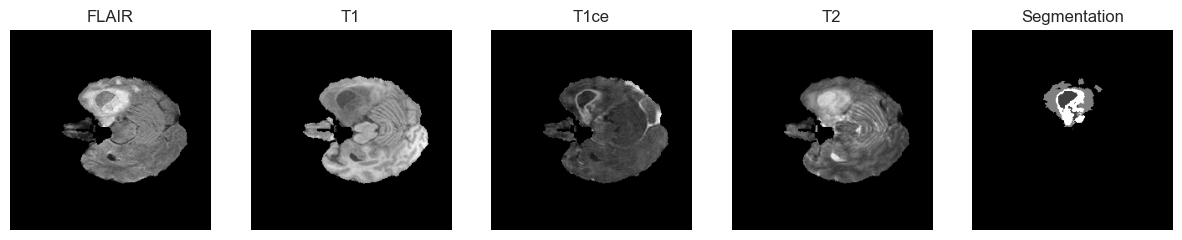

In [40]:

import nibabel as nib
import matplotlib.pyplot as plt

# Define the image paths
image_path_flair = r'D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii'
image_path_seg = r'D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii'
image_path_t1 = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1.nii"
image_path_t1ce = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii"
image_path_t2 = r"D:\code\archive_4\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii"

# Load the image data for each modality
flair_img = nib.load(image_path_flair)
seg_img = nib.load(image_path_seg)
t1_img = nib.load(image_path_t1)
t1ce_img = nib.load(image_path_t1ce)
t2_img = nib.load(image_path_t2)

# Extract data as numpy ndarray
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()
t1_data = t1_img.get_fdata()
t1ce_data = t1ce_img.get_fdata()
t2_data = t2_img.get_fdata()

# Get the image shape
height, width, depth = flair_data.shape

# Select a random layer number
layer = np.random.randint(0, depth)

# Define a channel to look at
channels = [flair_data, t1_data, t1ce_data, t2_data, seg_data]
channel_names = ['FLAIR', 'T1', 'T1ce', 'T2', 'Segmentation']

# Create subplots for each modality
fig, axes = plt.subplots(1, len(channels), figsize=(15, 3))

for i, (data, name) in enumerate(zip(channels, channel_names)):
    axes[i].imshow(data[:, :, layer], cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.show()

In [44]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(flair_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer
    
# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, flair_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

we can rotate by this code:

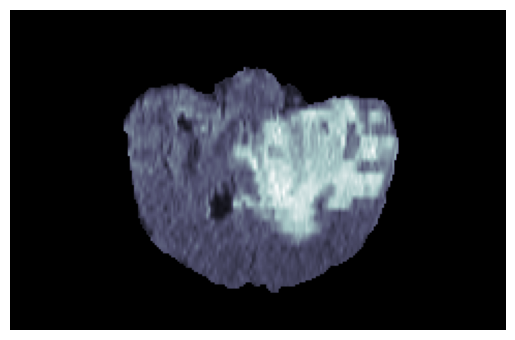

In [51]:
plt.imshow(ndi.rotate(flair_data[:, 128], 270), cmap='bone')
plt.axis('off')
plt.show()


***https://neuraldatascience.io/8-mri/read_viz.html***
We can use our skills with Matplotlib subplots to plot a series of slices through the brain, which is a more comprehensive way of visualizing the data. The biggest trick with this is deciding on the number of subplots (slices) we want, and then doing the necessary math to select the appropriate slices from the 3D volume such that the slices are evenly-spaced through the volume, and centered in the middle of the volume. For instance, below we will generate a 4 x 4 array of 16 subplots. Our number of slices — 184 — does not divide evenly by 16 (184 / 16 = 11.5). For this reason, we can’t simply run a for loop over a range of slice numbers that starts at 0 and goes up to the number of slices, in steps of n_slices / n_subplots. Instead, we use floor division (//) to generate the integer result of dividing the number of slices by subplots (11) so that we get a step size that ensures we have 16 evenly-spaced slices through the volume. Then, we determine the number of slices that will be covered by 16 subplots, spaced 11 slices apart from each other (which will be < 184). Finally, we compute a start_stop value which tells us which slice to start from (i.e., the first slice to plot), such that the set of slices we generate will be centered on the volume. This is determined by computing how many slices in the volume are not covered by our 16 subplots (i.e., the slices at either edge of the volume), and dividing this by 2, since half of those slices should be at one edge of the volume, at the other at the other end of the volume.

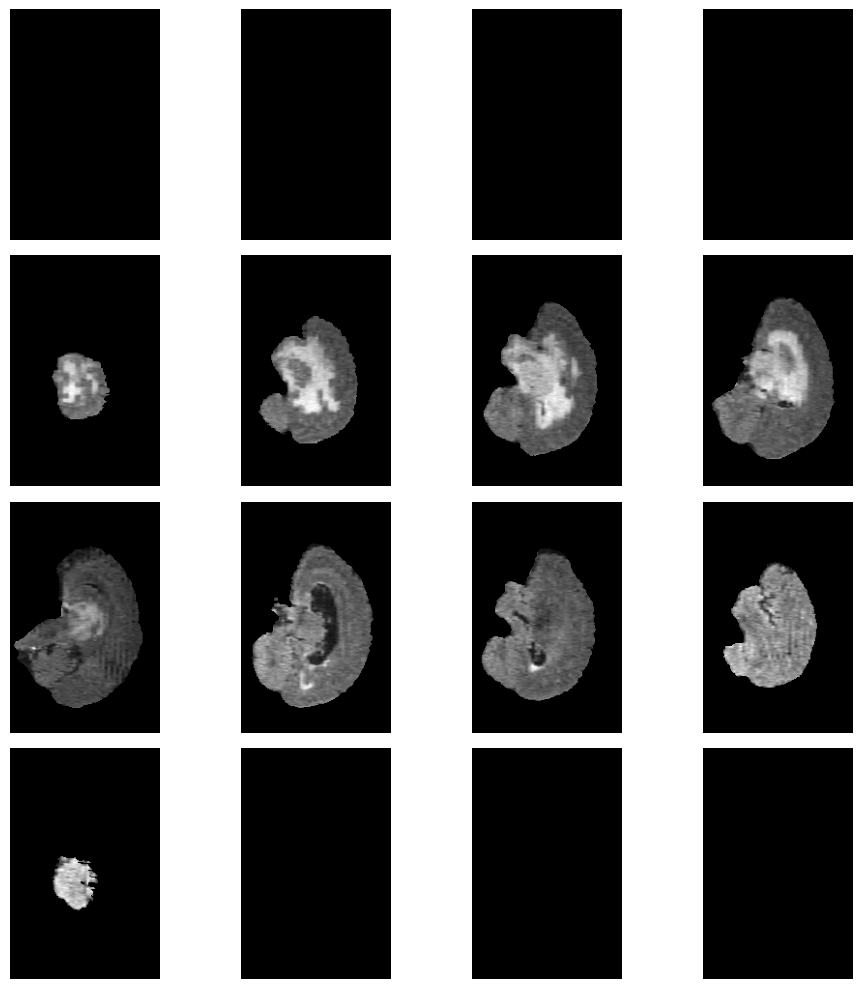

In [53]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = flair_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(flair_data[img, :, :], cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()


We can use the same approach to plot the data through other image planes. The only things we need to change are:

which dimension of the image to use to derive n_slice

the dimension that we specify the slice number in, inside the .imshow() command

adding rotation for axial and coronal slices, as we did above when plotting a single slice

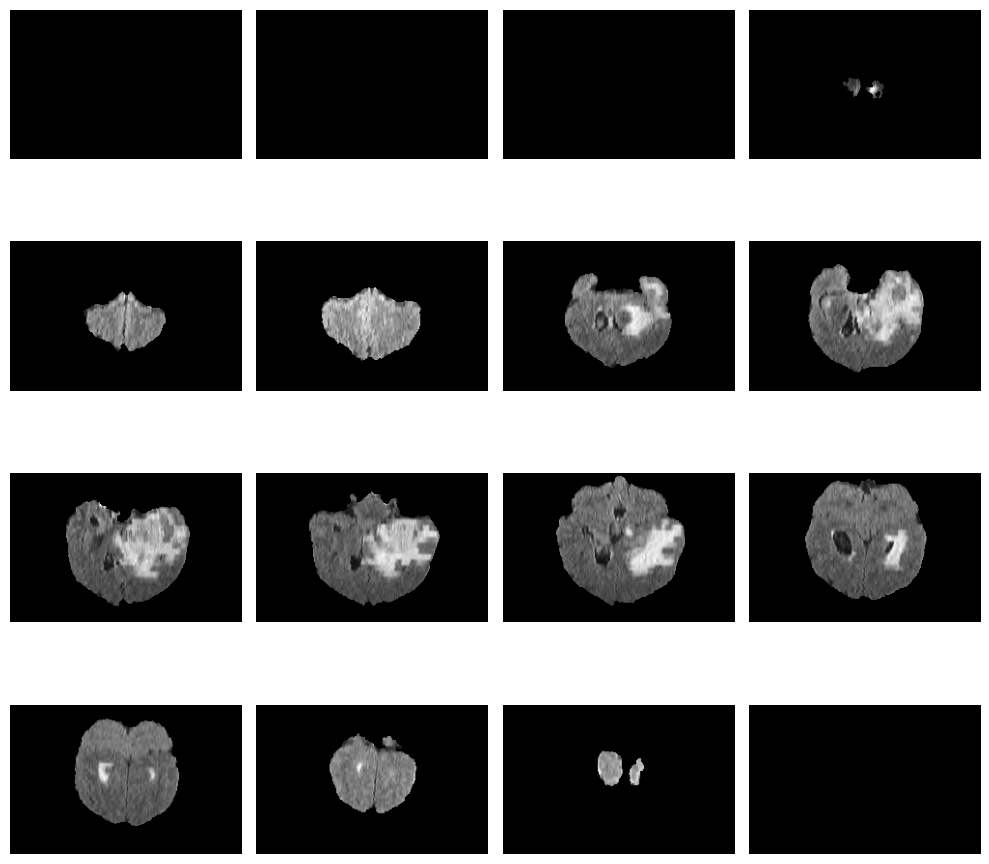

In [54]:
n_slice = flair_data.shape[1]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(flair_data[:, img, :], 270), 
                         cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()